In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import os
# import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [8]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of channels
img_channels = 1

In [9]:
path1 = '/home/saumya/Desktop/Telugu/telgu_dataset'    #path of folder of images
data_path = '/Users/sachaura/Downloads/Telug/'    #path of folder of images

# listing = os.listdir(path1) 
# num_samples=size(listing)
# print (num_samples)
#for file in listing:
    #im = Image.open(path1 + '/' + file)  
    #img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')
                #need to do some more processing here          
    #gray.save(path2 +'/' +  file, "bmp")

imlist = os.listdir(data_path)
data_dir_list = os.listdir(data_path)

In [10]:
im1 = array(Image.open('/home/saumya/Desktop/Telugu/t' + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2]# get the size of the images
print(m,n)
imnbr = len(imlist) # get the number of images

FileNotFoundError: [Errno 2] No such file or directory: '/home/saumya/Desktop/Telugu/t/.DS_Store'

In [12]:
num_channel=1
num_epoch=1

# Define the number of classes
print(data_path)
img_data_list=[]
for dataset in data_dir_list:
    if(dataset != ".DS_Store"):
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            if(img != ".DS_Store"):
#                 print(data_path + '/'+ dataset + '/'+ img)
                input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
                input_img_resize=cv2.resize(input_img,(28,28))
                img_data_list.append(input_img_resize)
            
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
num_classes = 10

num_of_samples = img_data.shape[0]
label = np.ones((num_of_samples,),dtype='int64')

/Users/sachaura/Downloads/Telug/
Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8

Loaded the images of dataset-9

(3000, 28, 28)
(3000, 1, 28, 28)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
label :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


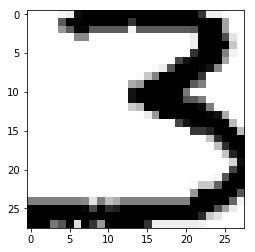

In [15]:
# # create matrix to store all flattened images
# immatrix = array([array(Image.open('/home/saumya/Desktop/Telugu/t' + '/'+  im2)).flatten()
#               for im2 in imlist],'f')
# #print(immatrix)
# num_class=10
               
# label=np.ones((num_samples,),dtype = int)
label[1:301]=0
label[301:601]=1
label[601:901]=2
label[901:1201]=3
label[1201:1501]=4
label[1501:1801]=5
label[1801:2101]=6
label[2101:2401]=7
label[2401:2701]=8
label[2701:3000]=9

names = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
# Y = np_utils.to_categorical(label, num_class)
# data,Label = shuffle(immatrix,Y, random_state=2)
# train_data = [data,Label]
# np.savetxt('/home/saumya/Desktop/svm_input_data/ny_test.csv', Label, delimiter = ',') 
# img=immatrix[17].reshape(img_rows,img_cols)
# plt.imshow(img)
# plt.show()

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, num_classes)
print(Y)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

i = 167
plt.imshow(X_train[i, 0], interpolation='nearest', cmap = 'gray')
print("label : ", y_train[i,:])


input_shape=img_data[0].shape

In [16]:
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, name = 'first_dense_layer'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [17]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 28, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 26, 26)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 11, 11)        18496     
__________

True

In [18]:

# Training
hist = model.fit(X_train, y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/Users/sachaura/anaconda3/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 13s - loss: 1.8527 - acc: 0.3296 - val_loss: 0.9139 - val_acc: 0.7383
Epoch 2/20
2400/2400 [==============================] - 13s - loss: 1.0303 - acc: 0.6229 - val_loss: 0.5956 - val_acc: 0.8133
Epoch 3/20
2400/2400 [==============================] - 12s - loss: 0.7978 - acc: 0.7200 - val_loss: 0.4303 - val_acc: 0.8783
Epoch 4/20
2400/2400 [==============================] - 13s - loss: 0.6343 - acc: 0.7712 - val_loss: 0.3176 - val_acc: 0.9267
Epoch 5/20
2400/2400 [==============================] - 13s - loss: 0.5219 - acc: 0.8200 - val_loss: 0.2521 - val_acc: 0.9283
Epoch 6/20
2400/2400 [==============================] - 14s - loss: 0.4344 - acc: 0.8525 - val_loss: 0.2115 - val_acc: 0.9350
Epoch 7/20
2400/2400 [==============================] - 14s - loss: 0.3703 - acc: 0.8746 - val_loss: 0.1711 - val_acc: 0.9600
Epoch 8/20
2400/2400 [==============================] - 16s - loss: 0.3

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11297960090140502
Test accuracy: 0.97


TypeError: Image data cannot be converted to float

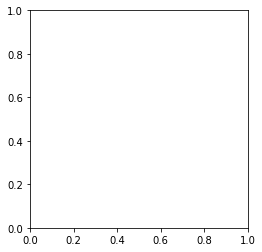

In [20]:
# Testing a new image
test_image = cv2.imread('/home/saumya/Desktop/Telugu/0/232.bmp')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)

test_image = X_test[120:121]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[120:121])

(1, 1, 28, 28)
[[5.6344293e-06 6.0230366e-05 1.5442893e-05 1.7188964e-03 2.3765535e-05
  6.8045454e-04 2.3855013e-04 9.9721330e-01 1.8386232e-06 4.1954605e-05]]
1/1 [==============================] - 0s
[7]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
# print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

             precision    recall  f1-score   support

    class 0       0.94      0.94      0.94        66
    class 1       0.92      0.95      0.93        58
    class 2       0.97      0.97      0.97        59
    class 3       0.96      0.96      0.96        57
    class 4       1.00      0.98      0.99        51
    class 5       0.95      0.98      0.97        57
    class 6       0.98      0.98      0.98        55
    class 7       0.98      1.00      0.99        53
    class 8       1.00      0.96      0.98        69
    class 9       1.00      0.99      0.99        75

avg / total       0.97      0.97      0.97       600

[[62  3  0  1  0  0  0  0  0  0]
 [ 2 55  0  0  0  1  0  0  0  0]
 [ 1  0 57  1  0  0  0  0  0  0]
 [ 0  0  2 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  1  0  0  0  0]
 [ 0  1  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0  0 54  1  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 1  1  0  0  0  1  0  0 66  0]
 [ 0  0  0  0  0  0  1  0  0 74]]


Confusion matrix, without normalization
[[62  3  0  1  0  0  0  0  0  0]
 [ 2 55  0  0  0  1  0  0  0  0]
 [ 1  0 57  1  0  0  0  0  0  0]
 [ 0  0  2 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  1  0  0  0  0]
 [ 0  1  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0  0 54  1  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 1  1  0  0  0  1  0  0 66  0]
 [ 0  0  0  0  0  0  1  0  0 74]]


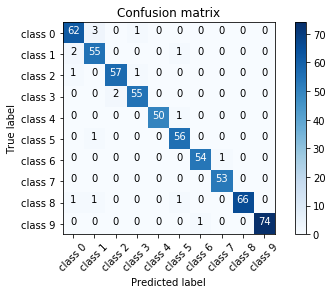

In [23]:
import matplotlib.pyplot as plt
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [24]:
import numpy
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from cv2 import CV_64F
K.set_image_dim_ordering('th')

In [27]:
model_dense_layer_output = Model(input=model.input, output=model.get_layer('first_dense_layer').output)
svm_x_train = model_dense_layer_output.predict(X_train)
svm_x_test = model_dense_layer_output.predict(X_test)
svm_y_train = model.predict_classes(X_train)
svm_y_test = model.predict_classes(X_test)

# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_train.csv', svm_x_train, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_train.csv', svm_y_train, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_test.csv', svm_x_test, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_test.csv', svm_y_test, delimiter = ',') 

print(svm_x_train)

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fi...)`
  """Entry point for launching an IPython kernel.


600/600 [==============================] - 1s     
[[-0.92  0.7  -1.85 ...  4.41 -2.77 -1.15]
 [-1.02 -2.37 -2.95 ... -3.19 -2.26  0.14]
 [-1.91  0.53 -1.28 ...  1.53 -0.28 -0.7 ]
 ...
 [-0.74 -0.58 -2.5  ...  3.34  0.7   0.97]
 [ 0.88 -0.34 -1.65 ...  1.51  0.09  0.24]
 [ 2.65  0.53 -2.08 ...  2.85 -1.33  0.24]]


In [28]:
import pandas as pd
data = pd.DataFrame({"0":[1,0,0,0,0,0,0,0,0,0],"1":[0,1,0,0,0,0,0,0,0,0],"2":[0,0,1,0,0,0,0,0,0,0],"3":[0,0,0,1,0,0,0,0,0,0],"4":[0,0,0,0,1,0,0,0,0,0],"5":[0,0,0,0,0,1,0,0,0,0],"6":[0,0,0,0,0,0,1,0,0,0],"7":[0,0,0,0,0,0,0,1,0,0],"8":[0,0,0,0,0,0,0,0,1,0],"9":[0,0,0,0,0,0,0,0,0,1]})

def get_animal(row):
    for c in data.columns:
        if row[c]==1:
            return c

In [29]:
Y.apply(get_animal, axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [30]:
from cv2 import CV_64F
import cv2
from sklearn import svm
from sklearn import metrics
import random
import json
from keras.models import model_from_json

from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = svm.LinearSVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

[[63  1  1  0  0  0  0  0  1  0]
 [ 1 56  0  0  0  1  0  1  1  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  1  0  0  1 56  0  0  0  1]
 [ 0  0  0  0  1  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  0  0  0  0  1  0  0 65  0]
 [ 0  0  0  0  1  0  0  0  0 73]]
Accuracy:  0.9766666666666667


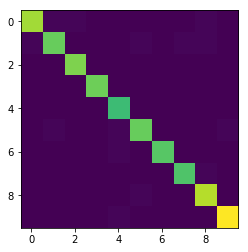

In [32]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
cm = metrics.confusion_matrix(svm_y_test, y_predicted)
print(cm)
plt.imshow(cm)
print("Accuracy: ",accuracy)

In [33]:
clf = svm.SVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

In [34]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
print("Accuracy: ",accuracy)

Accuracy:  0.985


In [35]:
clf = RandomForestClassifier(n_estimators = 75, n_jobs=10, random_state=0)
clf.fit(svm_x_train,svm_y_train)
predicted_output = clf.predict(svm_x_test)

In [36]:
total_test_samples = svm_y_test.shape[0]
correct_predictions=0
for i in range(0,total_test_samples):
    if(predicted_output[i]==svm_y_test[i]):
        correct_predictions+=1
        
accuracy=correct_predictions/(total_test_samples*1.0)
print("Accuracy:",accuracy)

Accuracy: 0.99


In [43]:
print(svm_y_train)

[ 1.  0.  0. ...,  0.  0.  0.]


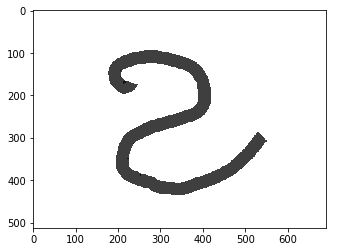

(28, 28)
(1, 1, 28, 28)
[[0.01 0.   0.02 0.   0.05 0.02 0.3  0.5  0.05 0.03]]
1/1 [==============================] - 0s
[7]


In [38]:
# Testing a new image
test_image = cv2.imread('/Users/sachaura/Downloads/digits/7_t.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

(1, 1, 32, 26, 26)
(32, 26, 26)


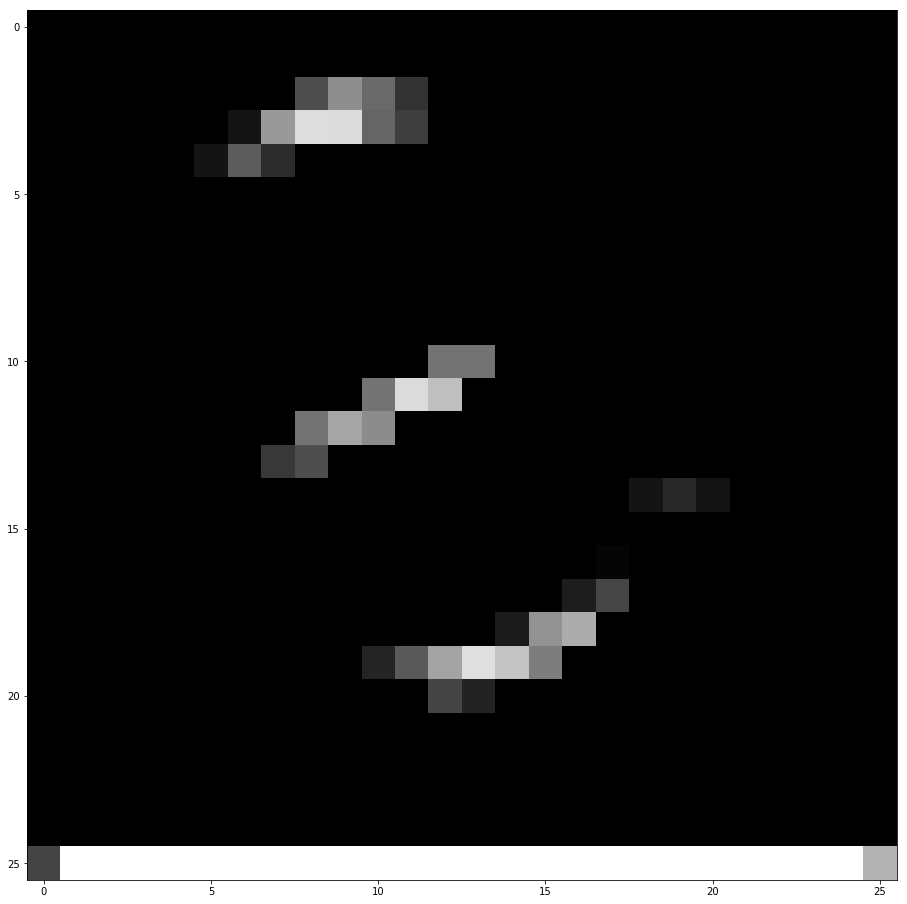

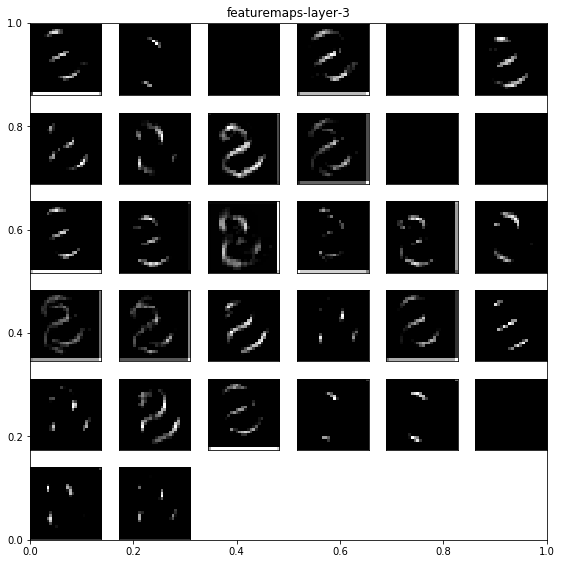

In [39]:
# Visualizing the intermediate layer

#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]  
# print (feature_maps)
print (np.shape(feature_maps))
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2, 0)),2, 0)
# print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')